In [32]:
#import functions we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def run_sim(omega,
            A_R1=5000,# m^2
            A_R2=50 # m^2
           ): 

    #Define parameters
    L=1000. #m
    D_H = 1. #m
    f = 0.1

    C_f = 1 + f*L/D_H 
    A_c = np.pi*D_H/4. # m^2
    g =9.8

    #Define the derivative as a function
    def Q(dh):
        return A_c * np.sqrt(2*g*np.abs(dh)/C_f)*np.abs(dh)/dh

    def R(t):
        return np.sin(omega*t) + 1.

    def dh_dt(h, t):
        h1 = h[0]
        h2 = h[1]
        this_R = R(t) 
        Q1 = Q(h1-h2)
        Q2 = Q(h2)
        dh1_dt = (R(t) - Q1)/A_R1
        dh2_dt = (Q1 - Q2)/A_R2
        return [dh1_dt, dh2_dt]

    P = 2*np.pi/omega
    print('P=',P)
    t_end = 3*P
    print('t_end=',t_end)
    t = np.linspace(0, t_end, 5000)

    R_avg = 1.
    h1_eq = C_f*R_avg**2./(g*A_c**2) 
    h2_eq = h1_eq/2. 

    #Solve using odeint
    h = odeint(dh_dt, [h1_eq, h2_eq], t)

    #Plot the solution
    h1 = h[:,0]
    h2 = h[:,1]
    plt.figure()
    print('h1=',h1[-10:]/h1_eq)
    plt.plot(t, h1/h1_eq)
    plt.plot(t, h2/h2_eq, '--')
    plt.plot(t, R(t), ':')
    plt.xlabel('Time (sec)')
    plt.ylabel('Normalized Head (m)')
    plt.legend(['h1','h2', 'R'])
    t_osc = P
    t_res_1 = h1_eq*A_R1/R_avg
    t_res_2 = h2_eq*A_R2/R_avg
    print("Dimensionless ratio 1 = ",t_osc/t_res_1)
    print("Dimensionless ratio 2 = ",t_osc/t_res_2)
    


P= 1570796.3267948967
t_end= 4712388.980384691
h1= [0.44675175 0.45010954 0.45348153 0.45686771 0.46026806 0.46368259
 0.46711127 0.4705541  0.47401106 0.47748216]
Dimensionless ratio 1 =  18.80331135315212
Dimensionless ratio 2 =  3760.6622706304242


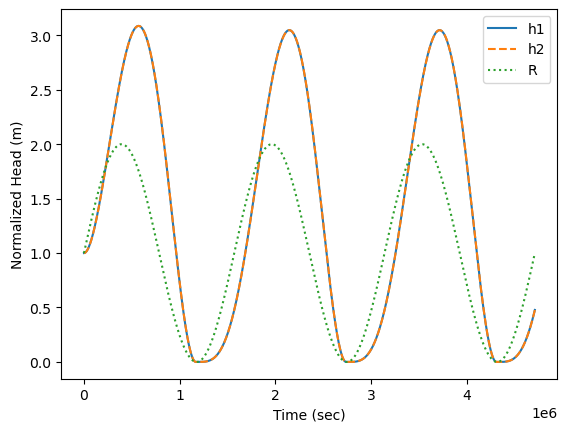

In [33]:
run_sim(4e-6)

**Interpretation** - Both reservoir response timescales are much shorter than timescale of recharge oscillation. Therefore, they can respond quickly compared to changes in recharge. The heads vary by a large amplitude and are only slightly lagged behind recharge curve.

P= 15707.963267948964
t_end= 47123.88980384689
Dimensionless ratio 1 =  0.18803311353152116
Dimensionless ratio 2 =  37.606622706304236


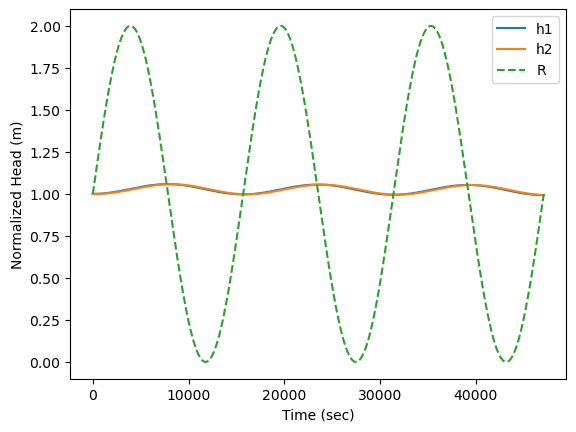

In [10]:
run_sim(4e-4)

**Interpretation** - The first reservoir response timescale is much longer than timescale of recharge oscillation. The 2nd reservoir has a response timescale that is quick compared to recharge variation. However, since water flows into the first reservoir first, it filters the recharge signal, creating a small change in head over time. The second reservoir tracks this same pattern, since it is fed from the first.

P= 157.07963267948966
t_end= 471.23889803846896
Dimensionless ratio 1 =  0.0018803311353152118
Dimensionless ratio 2 =  0.3760662270630424


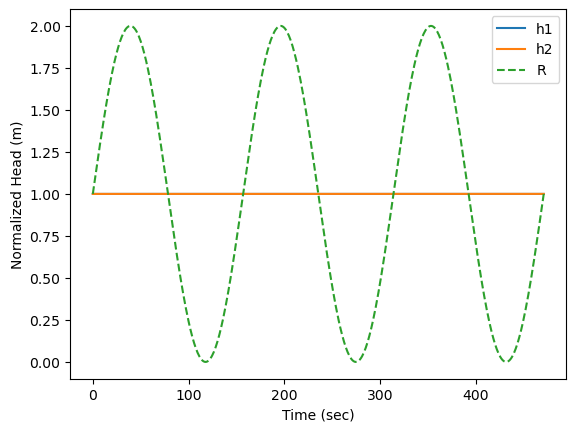

In [11]:
run_sim(4e-2)

**Interpretation** - Both reservoir response timescales are much longer than timescale of recharge oscillation. The signal is highly filtered and heads stay near equilibrium the whole time.

P= 1570796.3267948967
t_end= 4712388.980384691
h1= [0.75350401 0.759339   0.76519795 0.77108079 0.77698749 0.78291797
 0.78887218 0.79485007 0.80085156 0.80687661]
Dimensionless ratio 1 =  1880.3311353152121
Dimensionless ratio 2 =  37.60662270630424


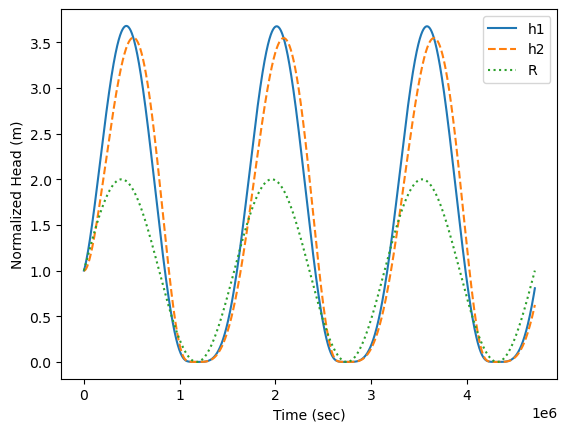

In [36]:
run_sim(4e-6, A_R1=50, A_R2=5000)

**Interpretation** - Both reservoir response timescales are much shorter than timescale of recharge oscillation, similar to the first case above. It behaves similarly to case 1, even though reservoirs are reversed in order.

P= 15707.963267948964
t_end= 47123.88980384689
h1= [0.78690645 0.78912249 0.79134828 0.79358381 0.79582908 0.79808407
 0.80034877 0.80262317 0.80490726 0.80720102]
Dimensionless ratio 1 =  18.803311353152118
Dimensionless ratio 2 =  0.3760662270630423


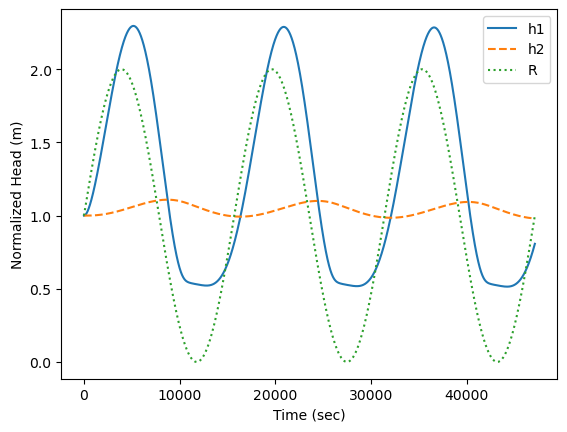

In [37]:
run_sim(4e-4, A_R1=50, A_R2=5000)

**Interpretation** - The second reservoir response timescale is much longer than timescale of recharge oscillation. The first reservoir has a response timescale that is quick compared to recharge variation. However, since water flows into the first reservoir first, before reservoir 2 has a chance to filter the signal, the head in the first reservoir varys with a large amplitude. Then the second, bigger, reservoir filters the recharge signal and has low head variability.

P= 157.07963267948966
t_end= 471.23889803846896
h1= [0.98734425 0.98734209 0.98734035 0.98733904 0.98733815 0.98733769
 0.98733765 0.98733804 0.98733885 0.98734009]
Dimensionless ratio 1 =  0.1880331135315212
Dimensionless ratio 2 =  0.0037606622706304236


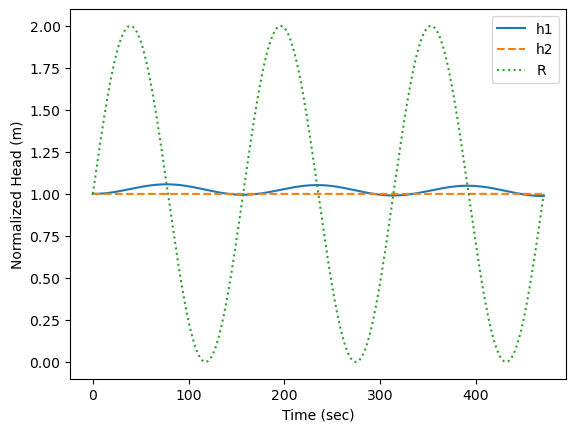

In [38]:
run_sim(4e-2, A_R1=50, A_R2=5000)

**Interpretation** - The first reservoir response timescale is modestly longer than timescale of recharge oscillation. It filters much of the recharge signal. The 2nd reservoir has a response timescale that much longer, and it creates a nearly completely filtered signal.